In [1]:
import os
import pandas as pd
from pathlib import Path
import shutil
from scipy import stats
from pydub import AudioSegment



In [2]:
our_files = Path('data')
for file in our_files.iterdir():
    print(file.name)

cv-other-train
cv-valid-train.csv
cv-valid-train
.DS_Store
cv-valid-test.csv
cv-other-test.csv
cv-other-train.csv
cv-other-dev
cv-invalid
cv-valid-dev
cv-invalid.csv
cv-other-dev.csv
cv-valid-dev.csv
cv-other-test
cv-valid-test
README.txt
LICENSE.txt


In [3]:
cwd = '/Users/franky/Documents/CS573/project'
group = "cv-valid-train"
data_path = os.path.join(cwd, "data", group)
os.chdir(data_path)
print(os.getcwd())

/Users/franky/Documents/CS573/project/data/cv-valid-train


In [4]:
df = pd.read_csv("/Users/franky/Documents/CS573/project/data/" + group + ".csv")
df = df.drop(columns=['text', 'up_votes', 'down_votes', 'duration'])
df_notna = df.dropna()
df_na = df[df.isna().any(axis=1)]

In [88]:
df

,filename,age,gender,accent
0,cv-valid-train/sample-000000.mp3,NaN,NaN,NaN
1,cv-valid-train/sample-000001.mp3,NaN,NaN,NaN
2,cv-valid-train/sample-000002.mp3,NaN,NaN,NaN
3,cv-valid-train/sample-000003.mp3,NaN,NaN,NaN
4,cv-valid-train/sample-000004.mp3,NaN,NaN,NaN
...,...,...,...,...
195771,cv-valid-train/sample-195771.mp3,thirties,male,england
195772,cv-valid-train/sample-195772.mp3,NaN,NaN,NaN
195773,cv-valid-train/sample-195773.mp3,NaN,NaN,NaN
195774,cv-valid-train/sample-195774.mp3,twenties,male,us


In [5]:
df_clean = df_notna[df_notna.gender!="other"]


In [89]:
df_clean

,filename,age,gender,accent
5,cv-valid-train/sample-000005.mp3,twenties,female,us
8,cv-valid-train/sample-000008.mp3,seventies,male,us
13,cv-valid-train/sample-000013.mp3,thirties,female,us
14,cv-valid-train/sample-000014.mp3,sixties,male,england
19,cv-valid-train/sample-000019.mp3,fifties,male,australia
...,...,...,...,...
195766,cv-valid-train/sample-195766.mp3,fourties,male,england
195767,cv-valid-train/sample-195767.mp3,thirties,female,us
195770,cv-valid-train/sample-195770.mp3,twenties,male,england
195771,cv-valid-train/sample-195771.mp3,thirties,male,england


In [6]:
df_clean.age.value_counts(normalize=True)

twenties     0.278832
thirties     0.255203
fourties     0.155220
fifties      0.139408
sixties      0.072444
teens        0.068935
seventies    0.026129
eighties     0.003829
Name: age, dtype: float64

In [7]:
df_clean.gender.value_counts(normalize=True)

male      0.736964
female    0.263036
Name: gender, dtype: float64

In [8]:
df_clean.accent.value_counts(normalize=True)

us                0.473478
england           0.235562
indian            0.071210
australia         0.065299
canada            0.060236
scotland          0.023710
newzealand        0.018471
african           0.018407
ireland           0.013377
philippines       0.005094
wales             0.004197
bermuda           0.003140
malaysia          0.002916
singapore         0.001987
hongkong          0.001586
southatlandtic    0.001330
Name: accent, dtype: float64

In [9]:
obs = pd.crosstab(index=df_notna["age"], columns=df_clean["gender"], margins=True)
obs

gender,female,male,All
age,,,
eighties,18,221,239
fifties,4019,4683,8702
fourties,2031,7658,9689
seventies,129,1502,1631
sixties,1691,2831,4522
teens,938,3365,4303
thirties,4318,11612,15930
twenties,3275,14130,17405
All,16419,46002,62421


In [10]:
stats.chi2_contingency(obs)

(3085.7415641518473,
 0.0,
 16,
 array([[   62.86571827,   176.13428173,   239.        ],
        [ 2288.9434325 ,  6413.0565675 ,  8702.        ],
        [ 2548.56043639,  7140.43956361,  9689.        ],
        [  429.01249579,  1201.98750421,  1631.        ],
        [ 1189.45095401,  3332.54904599,  4522.        ],
        [ 1131.8459653 ,  3171.1540347 ,  4303.        ],
        [ 4190.17109627, 11739.82890373, 15930.        ],
        [ 4578.14990148, 12826.85009852, 17405.        ],
        [16419.        , 46002.        , 62421.        ]]))

In [11]:
obs/63163

gender,female,male,All
age,,,
eighties,0.000285,0.003499,0.003784
fifties,0.063629,0.074142,0.137771
fourties,0.032155,0.121242,0.153397
seventies,0.002042,0.023780,0.025822
sixties,0.026772,0.044821,0.071593
teens,0.014850,0.053275,0.068125
thirties,0.068363,0.183842,0.252205
twenties,0.051850,0.223707,0.275557
All,0.259946,0.728306,0.988253


In [12]:
os.makedirs(os.path.join(data_path, "clean"), exist_ok=True)
# os.rmdir(path=os.path.join(data_path, "na"))
os.listdir()

['cv-valid-train', '.DS_Store', 'cv-valid-train-original', 'clean']

In [24]:
for file in df_clean.filename:
    if os.path.exists(file):
        print(file)
        src = file
        wav_name = Path(file).stem + ".wav"
        dst = os.path.join("clean", wav_name)
        sound = AudioSegment.from_mp3(src)
        sound.export(dst, format="wav")

cv-valid-train/sample-000005.mp3
cv-valid-train/sample-000008.mp3
cv-valid-train/sample-000013.mp3
cv-valid-train/sample-000014.mp3
cv-valid-train/sample-000019.mp3
cv-valid-train/sample-000020.mp3
cv-valid-train/sample-000023.mp3
cv-valid-train/sample-000026.mp3
cv-valid-train/sample-000027.mp3
cv-valid-train/sample-000029.mp3
cv-valid-train/sample-000034.mp3
cv-valid-train/sample-000036.mp3
cv-valid-train/sample-000039.mp3
cv-valid-train/sample-000044.mp3
cv-valid-train/sample-000047.mp3
cv-valid-train/sample-000049.mp3
cv-valid-train/sample-000051.mp3
cv-valid-train/sample-000053.mp3
cv-valid-train/sample-000054.mp3
cv-valid-train/sample-000056.mp3
cv-valid-train/sample-000059.mp3
cv-valid-train/sample-000065.mp3
cv-valid-train/sample-000068.mp3
cv-valid-train/sample-000072.mp3
cv-valid-train/sample-000073.mp3
cv-valid-train/sample-000077.mp3
cv-valid-train/sample-000081.mp3
cv-valid-train/sample-000082.mp3
cv-valid-train/sample-000088.mp3
cv-valid-train/sample-000092.mp3
cv-valid-t

In [26]:
for file in df_clean.filename:
    file_path = os.path.join("clean", Path(file).stem + ".wav")
    # print(file_path)
    if not os.path.exists(path=file_path):
        print(file, "does not exist.")

In [13]:
df_clean

,filename,age,gender,accent
5,cv-valid-train/sample-000005.mp3,twenties,female,us
8,cv-valid-train/sample-000008.mp3,seventies,male,us
13,cv-valid-train/sample-000013.mp3,thirties,female,us
14,cv-valid-train/sample-000014.mp3,sixties,male,england
19,cv-valid-train/sample-000019.mp3,fifties,male,australia
...,...,...,...,...
195766,cv-valid-train/sample-195766.mp3,fourties,male,england
195767,cv-valid-train/sample-195767.mp3,thirties,female,us
195770,cv-valid-train/sample-195770.mp3,twenties,male,england
195771,cv-valid-train/sample-195771.mp3,thirties,male,england


In [81]:
df_new = df_clean.copy()

In [82]:
df_new.age[df_new.age=="teens"] = '10s'
df_new.age[df_new.age=="twenties"] = '20s'
df_new.age[df_new.age=="thirties"] = '30s'
df_new.age[df_new.age=="fourties"] = '40s'
df_new.age[df_new.age=="fifties"] = '50s'
df_new.age[df_new.age=="sixties"] = '60s'
df_new.age[df_new.age=="seventies"] = '70s'
df_new.age[df_new.age=="eighties"] = '80s'
df_new




,filename,age,gender,accent
5,cv-valid-train/sample-000005.mp3,20s,female,us
8,cv-valid-train/sample-000008.mp3,70s,male,us
13,cv-valid-train/sample-000013.mp3,30s,female,us
14,cv-valid-train/sample-000014.mp3,60s,male,england
19,cv-valid-train/sample-000019.mp3,50s,male,australia
...,...,...,...,...
195766,cv-valid-train/sample-195766.mp3,40s,male,england
195767,cv-valid-train/sample-195767.mp3,30s,female,us
195770,cv-valid-train/sample-195770.mp3,20s,male,england
195771,cv-valid-train/sample-195771.mp3,30s,male,england


In [83]:
for i in df_new.index:
    new_name = os.path.splitext(df_new['filename'][i])[0] + ".wav"
    df_new['filename'][i] = new_name

# for file in df_clean.filename:
#     new_name = os.path.splitext(file)[0] + ".wav"
#     df.replace([file], new_name)

In [87]:
df_new.to_csv('cv-valid-train.csv')

In [84]:
df_new

,filename,age,gender,accent
5,cv-valid-train/sample-000005.wav,20s,female,us
8,cv-valid-train/sample-000008.wav,70s,male,us
13,cv-valid-train/sample-000013.wav,30s,female,us
14,cv-valid-train/sample-000014.wav,60s,male,england
19,cv-valid-train/sample-000019.wav,50s,male,australia
...,...,...,...,...
195766,cv-valid-train/sample-195766.wav,40s,male,england
195767,cv-valid-train/sample-195767.wav,30s,female,us
195770,cv-valid-train/sample-195770.wav,20s,male,england
195771,cv-valid-train/sample-195771.wav,30s,male,england


In [85]:
obs = pd.crosstab(index=df_new["age"], columns=df_clean["gender"], margins=True)
obs

gender,female,male,All
age,,,
10s,938,3365,4303
20s,3275,14130,17405
30s,4318,11612,15930
40s,2031,7658,9689
50s,4019,4683,8702
60s,1691,2831,4522
70s,129,1502,1631
80s,18,221,239
All,16419,46002,62421


In [126]:
round(obs/62421, 4)

gender,female,male,All
age,,,
10s,0.0150,0.0539,0.0689
20s,0.0525,0.2264,0.2788
30s,0.0692,0.1860,0.2552
40s,0.0325,0.1227,0.1552
50s,0.0644,0.0750,0.1394
60s,0.0271,0.0454,0.0724
70s,0.0021,0.0241,0.0261
80s,0.0003,0.0035,0.0038
All,0.2630,0.7370,1.0000


In [5]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np

,filename,age,gender,accent
0,cv-valid-train/sample-000000.mp3,NaN,NaN,NaN
1,cv-valid-train/sample-000001.mp3,NaN,NaN,NaN
2,cv-valid-train/sample-000002.mp3,NaN,NaN,NaN
3,cv-valid-train/sample-000003.mp3,NaN,NaN,NaN
4,cv-valid-train/sample-000004.mp3,NaN,NaN,NaN
...,...,...,...,...
195771,cv-valid-train/sample-195771.mp3,thirties,male,england
195772,cv-valid-train/sample-195772.mp3,NaN,NaN,NaN
195773,cv-valid-train/sample-195773.mp3,NaN,NaN,NaN
195774,cv-valid-train/sample-195774.mp3,twenties,male,us


In [1]:
rate, data = wav.read('cv-valid-train/sample-000008.wav')
print(rate)
fft_out = fft(data)
plt.plot(np.abs(fft_out)[0:5000])
plt.show()

NameError: name 'wav' is not defined

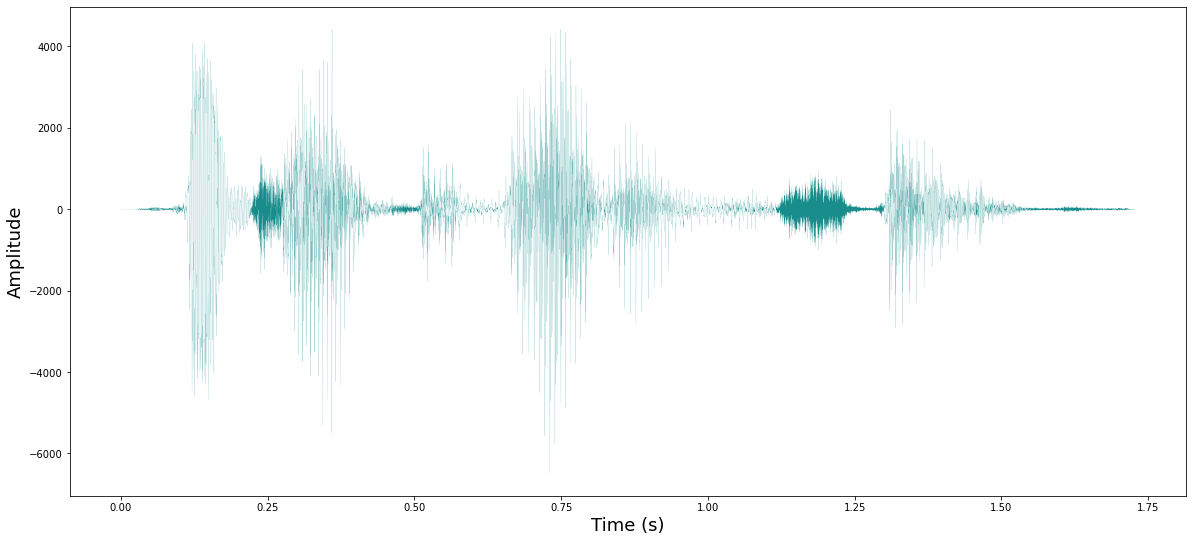

In [7]:
time = np.arange(0, float(data.shape[0]), 1) / rate
plt.figure(1, figsize=(20,9))
plt.subplot(111)
plt.plot(time, data, linewidth=0.1, alpha=0.9, color='teal') #
plt.xlabel('Time (s)', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.show()

/Users/franky/miniforge3/envs/RL_pytorch/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


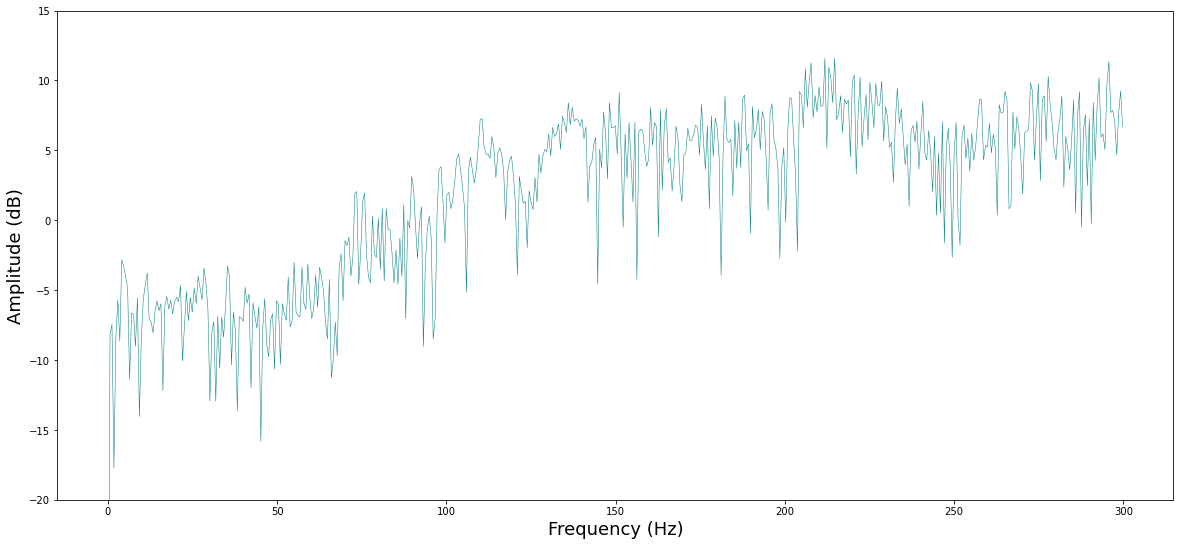

In [22]:
fourier = np.fft.fft(data)
n = len(data)
fourier = fourier[0:int(n/2)]
# scale by the number of points so that the magnitude does not depend on the length
fourier = fourier / float(n)
#calculate the frequency at each point in Hz
freqArray = np.arange(0, int(n/2), 1.0) * (rate*1.0/n);
x = freqArray[freqArray<300] #human voice range
y = 10*np.log10(fourier)[0:len(x)]
plt.figure(1,figsize=(20,9))
plt.plot(x, y, color='teal', linewidth=0.5)
plt.xlabel('Frequency (Hz)', fontsize=18)
plt.ylabel('Amplitude (dB)', fontsize=18)
plt.ylim(-20,15)
plt.show()

/Users/franky/miniforge3/envs/RL_pytorch/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


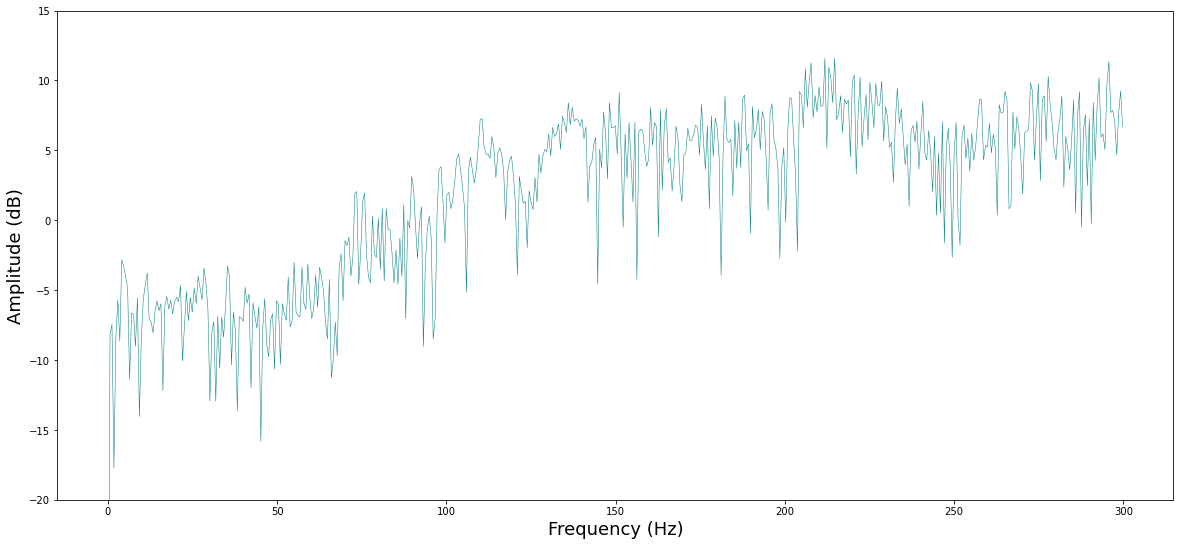

In [26]:
fourier = np.fft.fft(data)
n = len(data)
fourier = fourier[0:n]
# scale by the number of points so that the magnitude does not depend on the length
fourier = fourier / float(n)
#calculate the frequency at each point in Hz
freqArray = np.arange(0, n, 1.0) * (rate*1.0/n);
x = freqArray[freqArray<300] #human voice range
y = 10*np.log10(fourier)[0:len(x)]
plt.figure(1,figsize=(20,9))
plt.plot(x, y, color='teal', linewidth=0.5)
plt.xlabel('Frequency (Hz)', fontsize=18)
plt.ylabel('Amplitude (dB)', fontsize=18)
plt.ylim(-20,15)
plt.show()

/Users/franky/miniforge3/envs/RL_pytorch/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


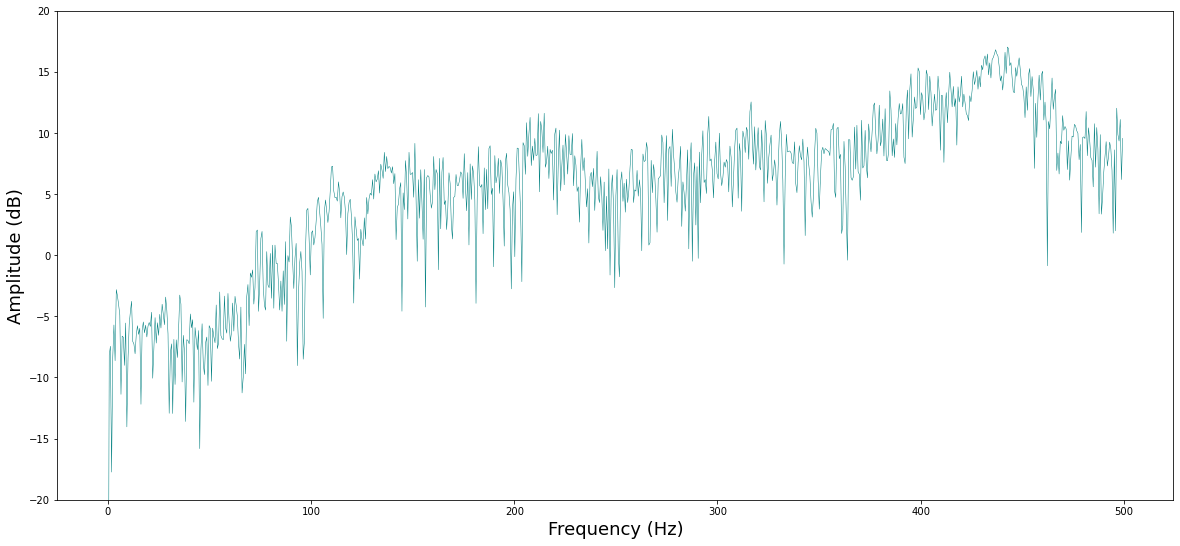

In [38]:
data = np.load("cv-valid-train-fft/sample-000008.npz")
y = data["fourier"]
x = data["freqArray"]
# x = freqArray[freqArray<300] #human voice range
# y = 10*np.log10(fourier)[0:len(x)]
plt.figure(1,figsize=(20,9))
plt.plot(x, y, color='teal', linewidth=0.5)
plt.xlabel('Frequency (Hz)', fontsize=18)
plt.ylabel('Amplitude (dB)', fontsize=18)
plt.ylim(-20,20)
plt.show()


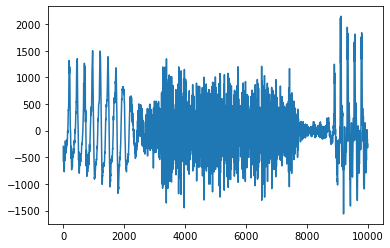

In [143]:
plt.plot(data[40000:50000])
plt.show()

48000


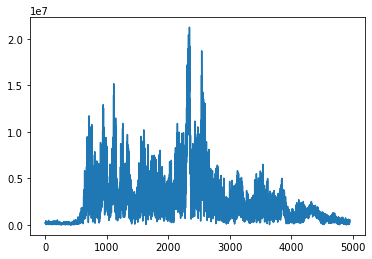

In [77]:
rate, data = wav.read('cv-valid-train/sample-000014.wav')
print(rate)
fft_out = fft(data)
plt.plot(np.abs(fft_out)[50:5000])
plt.show()

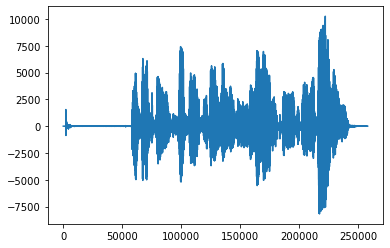

In [62]:
plt.plot(data)
plt.show()

In [96]:
df_female = df_new[df_new['gender']== 'female']

In [97]:
df_male = df_new[df_new['gender']== 'male']

In [114]:
mean_frequency = []
for i, file in enumerate(df_female['filename']):
    rate, data = wav.read(file)
    fft_out = abs(fft(data)[0:5000])
    fft_out = fft_out/sum(fft_out)
    mean_frequency.append(np.dot(np.arange(5000), fft_out))
    if i%100 ==0:
        print(i)
mean_frequency_female = np.array(mean_frequency)
print(mean_frequency_female.mean())
    

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
2184.0089672640497


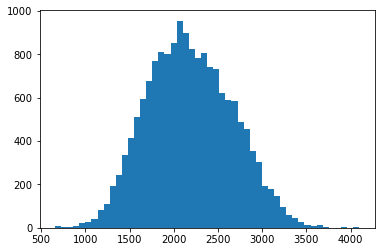

In [115]:
plt.hist(mean_frequency_female, bins=50)
plt.show()

In [103]:
mean_frequency = []
for i, file in enumerate(df_male['filename']):
    rate, data = wav.read(file)
    fft_out = abs(fft(data)[0:5000])
    fft_out = fft_out/sum(fft_out)
    mean_frequency.append(np.dot(np.arange(5000), fft_out))
    if i%100 ==0:
        print(i)
mean_frequency = np.array(mean_frequency)
print(mean_frequency.mean())

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000


/var/folders/b_/mrlnmdlx4xbg2hq4rgn83th80000gn/T/ipykernel_73067/2516307559.py:5: RuntimeWarning: invalid value encountered in true_divide
  fft_out = fft_out/sum(fft_out)


14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18500
18600
18700
18800
18900
19000
19100
19200
19300
19400
19500
19600
19700
19800
19900
20000
20100
20200
20300
20400
20500
20600
20700
20800
20900
21000
21100
21200
21300
21400
21500
21600
21700
21800
21900
22000
22100
22200
22300
22400
22500
22600
22700
22800
22900
23000
23100
23200
23300
23400
23500
23600
23700
23800
23900
24000
24100
24200
24300
24400
24500
24600
24700
24800
24900
25000
25100
25200
25300
25400
25500
25600
25700
25800
25900
26000
26100
26200
26300
26400
26500
26600
26700
26800
26900
27000
27100
27200
27300
27400
27500
27600
27700
27800
27900
28000
28100
28200
28300
28400
28500
28600
28700
28800
28900
29000
29100
29200
29300
29400
29500
29600
29700
29800
29900
30000
30100
30200
30300
30400
30500
30600
3070

In [112]:
mean_frequency_male = mean_frequency[~np.isnan(mean_frequency)]

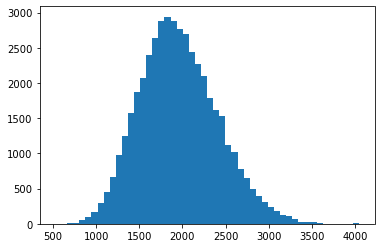

In [113]:
plt.hist(mean_frequency_male, bins=50)
plt.show()